In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import zscore

In [54]:
df = pd.read_csv('Hair_Salon.csv')

In [55]:
df.head()

,ID,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed,Satisfaction
0,1,8.5,3.9,2.5,5.9,4.8,4.9,6.0,6.8,4.7,5.0,3.7,8.2
1,2,8.2,2.7,5.1,7.2,3.4,7.9,3.1,5.3,5.5,3.9,4.9,5.7
2,3,9.2,3.4,5.6,5.6,5.4,7.4,5.8,4.5,6.2,5.4,4.5,8.9
3,4,6.4,3.3,7.0,3.7,4.7,4.7,4.5,8.8,7.0,4.3,3.0,4.8
4,5,9.0,3.4,5.2,4.6,2.2,6.0,4.5,6.8,6.1,4.5,3.5,7.1


In [56]:
df.describe()

,ID,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed,Satisfaction
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.00000,100.000000,100.000000
mean,50.500000,7.810000,3.672000,5.365000,5.442000,4.010000,5.805000,5.12300,6.974000,6.043000,4.27800,3.886000,6.918000
std,29.011492,1.396279,0.700516,1.530457,1.208403,1.126943,1.315285,1.07232,1.545055,0.819738,0.92884,0.734437,1.191839
min,1.000000,5.000000,2.200000,1.300000,2.600000,1.900000,2.300000,2.90000,3.700000,4.100000,2.00000,1.600000,4.700000
25%,25.750000,6.575000,3.275000,4.250000,4.600000,3.175000,4.700000,4.50000,5.875000,5.400000,3.70000,3.400000,6.000000
50%,50.500000,8.000000,3.600000,5.400000,5.450000,4.000000,5.750000,4.90000,7.100000,6.100000,4.40000,3.900000,7.050000
75%,75.250000,9.100000,3.925000,6.625000,6.325000,4.800000,6.800000,5.80000,8.400000,6.600000,4.80000,4.425000,7.625000
max,100.000000,10.000000,5.700000,8.500000,7.800000,6.500000,8.400000,8.20000,9.900000,8.100000,6.70000,5.500000,9.900000


In [57]:
df.shape

(100, 13)

In [58]:
df.isnull().sum()

ID              0
ProdQual        0
Ecom            0
TechSup         0
CompRes         0
Advertising     0
ProdLine        0
SalesFImage     0
ComPricing      0
WartyClaim      0
OrdBilling      0
DelSpeed        0
Satisfaction    0
dtype: int64

In [59]:
df.drop('ID', axis=1, inplace=True)

# Univariate Analysis

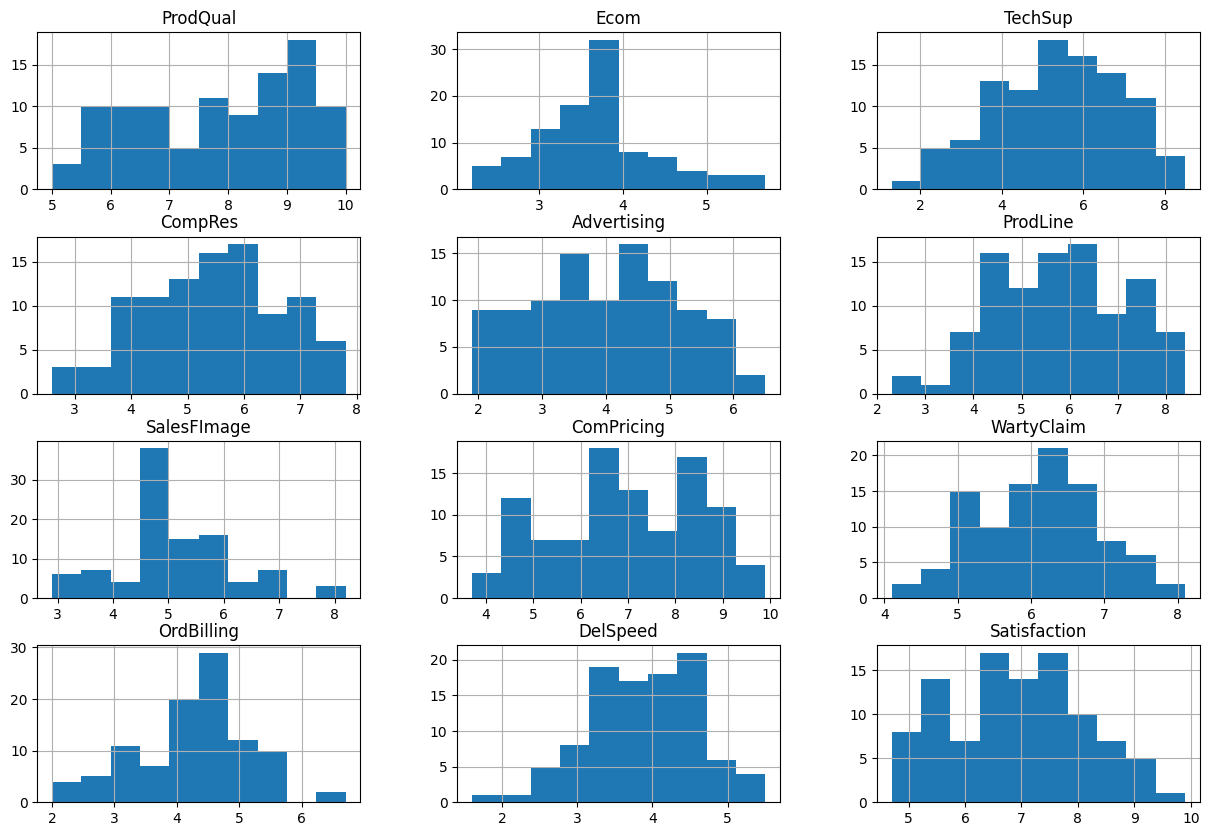

In [60]:
df.hist(figsize=(15, 10))
plt.show()

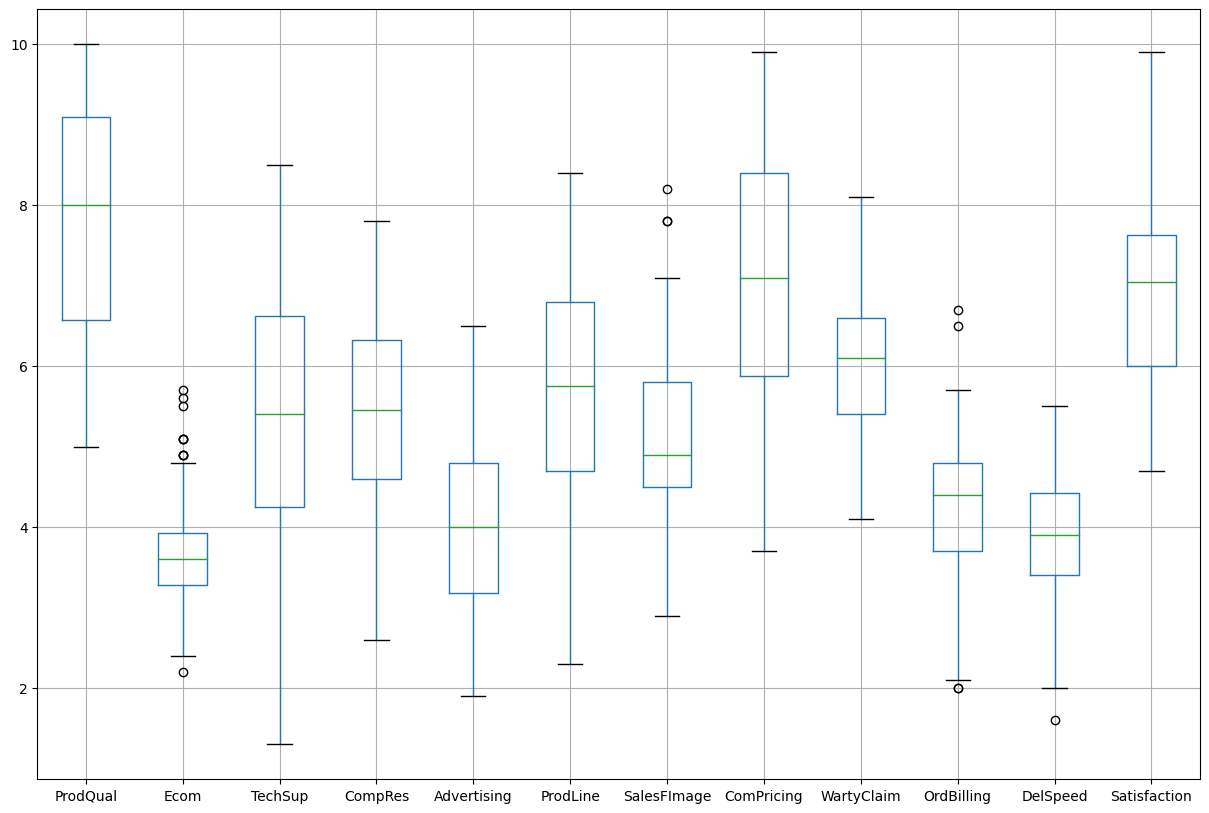

In [61]:
df.boxplot(figsize=(15, 10))
plt.show()

# Multivariate Analysis

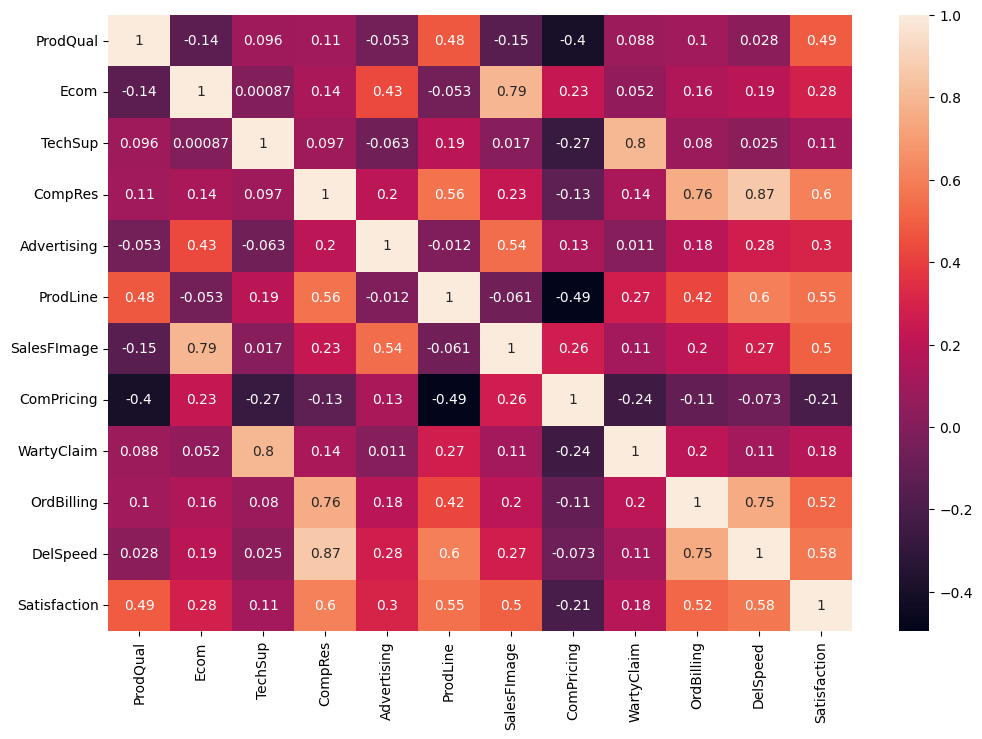

In [62]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True)
plt.show()

# Scaling Variables

In [63]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [64]:
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

In [65]:
df_scaled.describe()

,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed,Satisfaction
count,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
mean,9.188483e-16,1.011413e-15,1.029177e-15,-1.432188e-16,-6.061818e-16,2.531308e-16,6.178391e-16,-7.105427e-16,-1.247891e-15,4.751755e-16,4.241052e-16,1.296740e-15
std,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00
min,-2.022630e+00,-2.111893e+00,-2.669451e+00,-2.363712e+00,-1.881755e+00,-2.678246e+00,-2.083519e+00,-2.129693e+00,-2.382210e+00,-2.464877e+00,-3.128268e+00,-1.870365e+00
25%,-8.889494e-01,-5.695798e-01,-7.322109e-01,-7.002976e-01,-7.446754e-01,-8.443545e-01,-5.839103e-01,-7.148848e-01,-7.883484e-01,-6.254166e-01,-6.650649e-01,-7.741184e-01
50%,1.367614e-01,-1.032991e-01,2.298420e-02,6.653659e-03,-8.918268e-03,-4.202669e-02,-2.090080e-01,8.196131e-02,6.988470e-02,1.320083e-01,1.915825e-02,1.113111e-01
75%,9.285383e-01,3.629816e-01,8.274312e-01,7.343976e-01,7.045432e-01,7.603011e-01,6.345221e-01,9.275939e-01,6.829084e-01,5.648226e-01,7.375925e-01,5.961892e-01
max,1.576356e+00,2.909592e+00,2.058728e+00,1.961166e+00,2.220649e+00,1.982896e+00,2.883936e+00,1.903324e+00,2.521979e+00,2.620690e+00,2.208672e+00,2.514620e+00


# Covariance and Correlation Matrix After Scaling

In [66]:
cov_matrix = np.cov(df_scaled.T)
print("Covariance Matrix:\n", cov_matrix)

Covariance Matrix:
 [[ 1.01010101e+00 -1.38548704e-01  9.65661154e-02  1.07444445e-01
  -5.40132667e-02  4.82316579e-01 -1.53346338e-01 -4.05335236e-01
   8.92043497e-02  1.05356640e-01  2.79979825e-02  4.91237372e-01]
 [-1.38548704e-01  1.01010101e+00  8.75544162e-04  1.41595213e-01
   4.34233041e-01 -5.32200387e-02  7.99539102e-01  2.31780203e-01
   5.24224157e-02  1.57724577e-01  1.93571786e-01  2.85601025e-01]
 [ 9.65661154e-02  8.75544162e-04  1.01010101e+00  9.76329270e-02
  -6.35051180e-02  1.94571168e-01  1.71621612e-02 -2.73521901e-01
   8.05220127e-01  8.09109340e-02  2.56976702e-02  1.13734524e-01]
 [ 1.07444445e-01  1.41595213e-01  9.76329270e-02  1.01010101e+00
   1.98905906e-01  5.67087831e-01  2.32072486e-01 -1.29246720e-01
   1.41826562e-01  7.64513729e-01  8.73829997e-01  6.09356166e-01]
 [-5.40132667e-02  4.34233041e-01 -6.35051180e-02  1.98905906e-01
   1.01010101e+00 -1.16674936e-02  5.47680463e-01  1.35572620e-01
   1.09010852e-02  1.86096560e-01  2.78649579e-01  3

In [67]:
corr_matrix = df_scaled.corr()
print("Correlation matrix:\n", corr_matrix)

Correlation matrix:
               ProdQual      Ecom   TechSup   CompRes  Advertising  ProdLine   
ProdQual      1.000000 -0.137163  0.095600  0.106370    -0.053473  0.477493  \
Ecom         -0.137163  1.000000  0.000867  0.140179     0.429891 -0.052688   
TechSup       0.095600  0.000867  1.000000  0.096657    -0.062870  0.192625   
CompRes       0.106370  0.140179  0.096657  1.000000     0.196917  0.561417   
Advertising  -0.053473  0.429891 -0.062870  0.196917     1.000000 -0.011551   
ProdLine      0.477493 -0.052688  0.192625  0.561417    -0.011551  1.000000   
SalesFImage  -0.151813  0.791544  0.016991  0.229752     0.542204 -0.061316   
ComPricing   -0.401282  0.229462 -0.270787 -0.127954     0.134217 -0.494948   
WartyClaim    0.088312  0.051898  0.797168  0.140408     0.010792  0.273078   
OrdBilling    0.104303  0.156147  0.080102  0.756869     0.184236  0.424408   
DelSpeed      0.027718  0.191636  0.025441  0.865092     0.275863  0.601850   
Satisfaction  0.486325  0.28274

# Checking Outliers

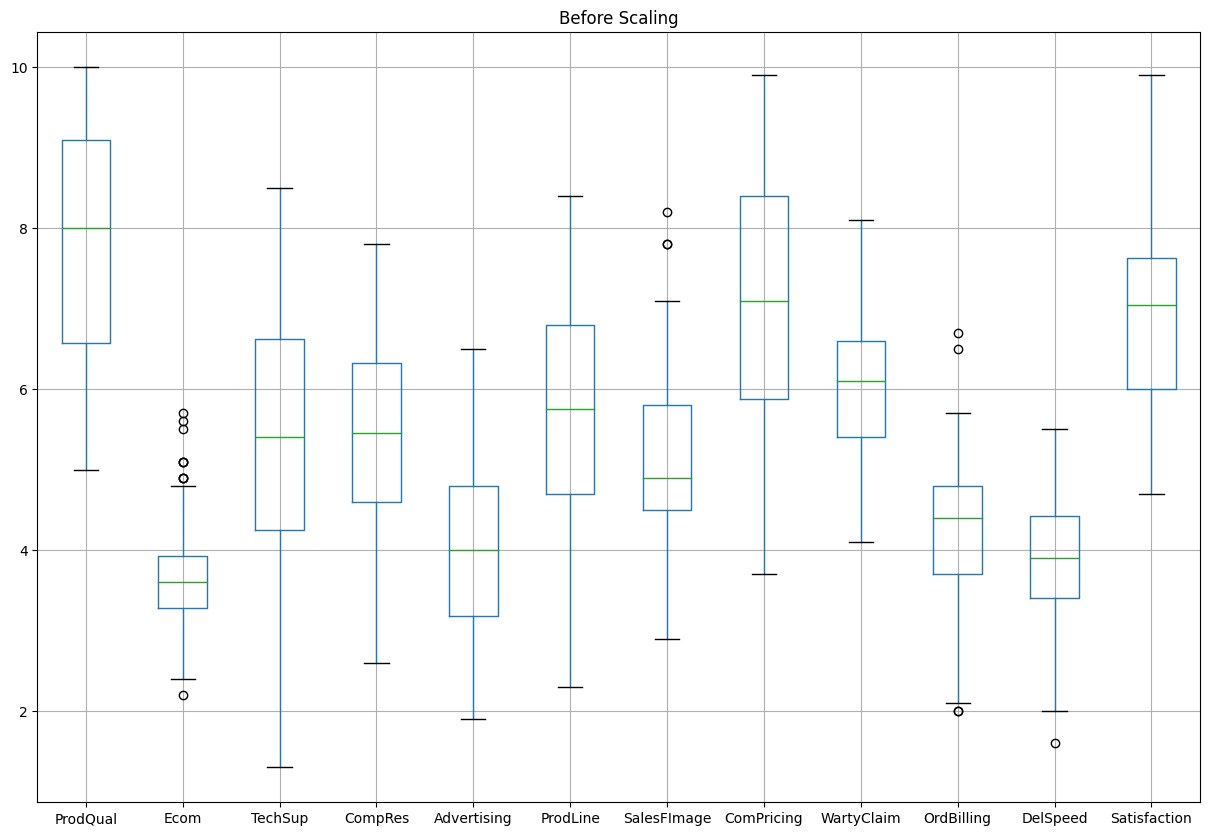

In [68]:
# Before Scaling
df.boxplot(figsize=(15,10))
plt.title("Before Scaling")
plt.show()

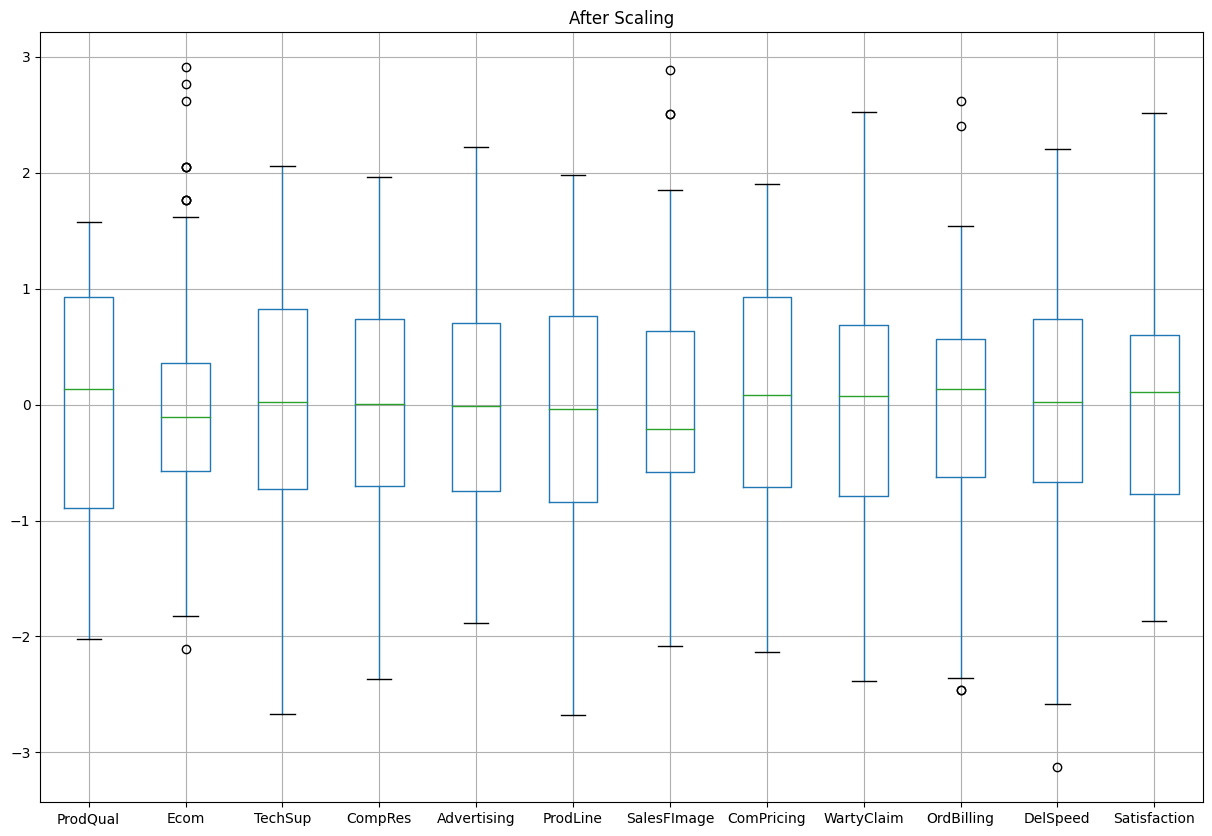

In [69]:
# After Scaling
df_scaled.boxplot(figsize=(15,10))
plt.title("After Scaling")
plt.show()

# Creating Covariance Matrix, EigenValues, and EigenVectors

In [70]:
# Using scaled data
cov_matrix = np.cov(df_scaled.T)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

print("Eigenvalues:\n", eigenvalues)
print("Eigenvectors:\n", eigenvectors)

Eigenvalues:
 [4.08369694 2.57871152 1.70931735 1.22984483 0.6423868  0.57427406
 0.40689671 0.32775774 0.23852472 0.14568036 0.08398124 0.10013985]
Eigenvectors:
 [[ 0.15855116 -0.31313152 -0.07356137 -0.61407082 -0.24964531  0.36499541
  -0.12640774 -0.32687751 -0.18602426  0.2037033   0.21787575  0.22885317]
 [ 0.1661857   0.44059261  0.23651951 -0.19628244 -0.18886909 -0.46540483
  -0.00824784 -0.50785197 -0.21574952  0.03718659 -0.35323725 -0.02881148]
 [ 0.12514332 -0.23828985  0.61631236  0.17941402 -0.03977108  0.12392836
   0.01346077  0.08182818 -0.54753081 -0.42475155  0.10580091 -0.01766533]
 [ 0.42263337  0.00134121 -0.19665426  0.27970497 -0.03340857  0.01495235
   0.00463818  0.14929932 -0.43697539  0.58601845  0.05627641 -0.37853377]
 [ 0.1807615   0.35724531  0.0898675  -0.20600014  0.76107633  0.4189084
   0.07155058 -0.12282896 -0.04176506 -0.02836138 -0.04824083 -0.0968768 ]
 [ 0.35283874 -0.29778667 -0.11122737 -0.10008828  0.0250607  -0.1958228
   0.63397913 -0.22

# First Principal Component

In [71]:
# Eigenvector of the first PC
print("Eigenvector of the first PC:\n", eigenvectors[:, 0])

Eigenvector of the first PC:
 [ 0.15855116  0.1661857   0.12514332  0.42263337  0.1807615   0.35283874
  0.21794995 -0.13483701  0.17499123  0.38797945  0.4223407   0.41302455]


# Cumulative Values of the EigenValues

In [72]:
var_explained = [(i / sum(eigenvalues))*100 for i in sorted(eigenvalues, reverse=True)]
cum_var_explained = np.cumsum(var_explained)

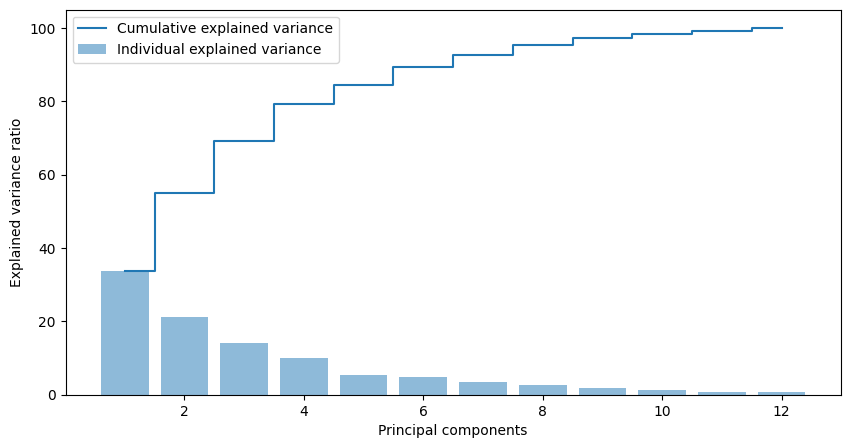

In [73]:
plt.figure(figsize=(10,5))
plt.bar(range(1,len(var_explained)+1), var_explained, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1,len(cum_var_explained)+1), cum_var_explained, where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

# Performing PCA and Exporting Scores

In [74]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_scaled)

In [75]:
df_pca = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])

In [76]:
df_pca.to_csv('Hair_Salon_PCA_Scores.csv', index=False)

In [77]:
pca_scores = pd.read_csv('Hair_Salon_PCA_Scores.csv')

In [78]:
pca_scores.head(100)

,PC1,PC2
0,-0.490389,1.580229
1,-0.495644,-2.485075
2,-2.727909,-0.761250
3,2.236864,0.176334
4,0.644061,-1.392029
...,...,...
95,-0.424050,0.138239
96,1.630872,0.975224
97,3.417553,-1.765533
98,-0.483486,2.318799
